In [1]:
import numpy as np

import heapq
import string
from nltk.tokenize import RegexpTokenizer 
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer

from keras.models import Sequential, load_model

from keras.layers.core import Dense, Activation
from keras.layers import Embedding
from keras.layers import LSTM,Bidirectional

import pickle

from tensorflow.keras.optimizers import Adam
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
from keras.layers import TimeDistributed
nlp = English()

In [2]:
def create_wordlist(doc):
    wl = []
    for word in doc:
        if word.text not in ("\n","\n\n",'\u2009','\xa0'):
            wl.append(word.text.lower())
    return wl

In [3]:
path = 'data/data.txt'
text = open(path, encoding = 'utf8').read().lower()
doc = nlp(text)


In [4]:
path2 = 'data/data2.txt'
text2 = open(path,encoding = 'utf-8').read().lower()
doc2 = nlp(text2)

In [5]:
words = create_wordlist(doc)
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
for ele in words:
    if ele in punc:
        words.remove(ele)

In [6]:
words2 = create_wordlist(doc2)
for i in words2:
    if i in punc:
        words2.remove(i)

In [7]:
words = words+words2

In [8]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))


In [9]:
len(unique_word_index)

2577

In [10]:
from gensim.test.utils import datapath, get_tmpfile

from gensim.models import KeyedVectors

from gensim.scripts.glove2word2vec import glove2word2vec

In [11]:
word2vec = KeyedVectors.load_word2vec_format('data/glove.6B.300d.txt',binary = False,no_header = True)

In [12]:
EMBEDDING_SIZE = 300
VOCAB_SIZE = len(unique_word_index)+1
embedding_weights = np.zeros((VOCAB_SIZE,EMBEDDING_SIZE))
for word,index in unique_word_index.items():
    try:
        embedding_weights[index, :] = word2vec[word]
    except KeyError:
        pass

In [13]:
embedding_weights.shape

(2578, 300)

In [14]:
LENGTH_WORD = 5
next_words = []
prev_words = []
for j in range(len(words) - LENGTH_WORD):
     prev_words.append(words[j:j + LENGTH_WORD])
     next_words.append(words[j + LENGTH_WORD])
print(prev_words[0])
print(next_words[0])

['\ufeff', '\n\n\n\n', 'one', 'morning', 'when']
gregor


In [18]:
X = np.zeros((len(prev_words),LENGTH_WORD,len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words):
       for j, each_word in enumerate(each_words):
            X[i,j , unique_word_index[each_word]] = 1
       Y[i, unique_word_index[next_words[i]]] = 1

In [ ]:
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)
    def build(self,input_shape):
        self.W-self.add_weight(name = 'attention_weight',shape([input_shape]))

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
class LSTMmodel(nn.Module):
    def __init__(self,input_size,embedding_size,hidden_size,  output_size):
        self.embedding = nn.Embedding(input_size,embedding_size)
        self.lstm = nn.LSTM(
            input_size = embedding_size,
            hidden_size = hidden_size,
            num_layers = 2,
            bidirectional = True,
            batch_first = True
        )
        self.dense = nn.Linear(hidden_size*2,output_size)
    def forward(self,sequences,sequence_lens):
        embedd = self.embedding(sequences)
        
        packed = nn.utils.rnn.pa_padded_sequences(
            embedded,
            sequence_lens,
            enforce_sorted = False,
            batch_first = True
        )  
        packed_outputs,(h,c) = self.lstm(packed)
        lsm_outputs,lens = nn.utils.

In [19]:
model = Sequential()
model.add(LSTM(128,input_shape = (LENGTH_WORD,len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

In [110]:
model = Sequential()
model.add(Embedding(input_dim = VOCAB_SIZE,
                  output_dim = EMBEDDING_SIZE,
                  input_length =5,
                  weights = [embedding_weights],
                  trainable = True))

model.add(Bidirectional(LSTM(64,return_sequences = True),input_shape = (None,3,len(unique_words),EMBEDDING_SIZE)))
model.add(TimeDistributed(Dense(len(unique_words),activation = 'softmax')))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               1385472   
_________________________________________________________________
dense (Dense)                (None, 2577)              332433    
_________________________________________________________________
activation (Activation)      (None, 2577)              0         
Total params: 1,717,905
Trainable params: 1,717,905
Non-trainable params: 0
_________________________________________________________________


In [71]:
X.shape

(46375, 5, 2577)

In [52]:
Y.shape

(46375, 2577)

In [21]:
optimizer = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=8, shuffle=True).history

Epoch 1/8
345/345 [==============================] - 37s 99ms/step - loss: 5.7320 - accuracy: 0.0837 - val_loss: 5.0266 - val_accuracy: 0.1320
Epoch 2/8
345/345 [==============================] - 31s 89ms/step - loss: 4.2124 - accuracy: 0.2141 - val_loss: 3.8195 - val_accuracy: 0.2561
Epoch 3/8
345/345 [==============================] - 31s 90ms/step - loss: 2.4435 - accuracy: 0.4763 - val_loss: 2.4142 - val_accuracy: 0.4636
Epoch 4/8
345/345 [==============================] - 32s 91ms/step - loss: 0.9825 - accuracy: 0.7752 - val_loss: 1.1498 - val_accuracy: 0.7352
Epoch 5/8
345/345 [==============================] - 31s 89ms/step - loss: 0.3480 - accuracy: 0.9269 - val_loss: 0.4154 - val_accuracy: 0.9086
Epoch 6/8
345/345 [==============================] - 31s 90ms/step - loss: 0.1262 - accuracy: 0.9786 - val_loss: 0.1321 - val_accuracy: 0.9810
Epoch 7/8
345/345 [==============================] - 31s 90ms/step - loss: 0.0579 - accuracy: 0.9920 - val_loss: 0.0624 - val_accuracy: 0.9922

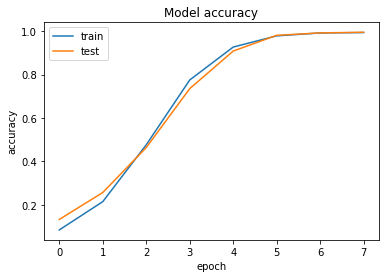

In [22]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')

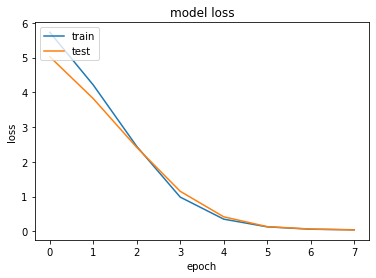

In [24]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [25]:
def prepare_input(text):
    x = np.zeros((1,30, len(unique_words)))
    for t, char in enumerate(text.split()):
        x[0, t,unique_word_index[char]] = 1.
    return x

In [26]:
def sample(preds, top_n=3):
   preds = np.asarray(preds).astype('float64')
   preds = np.log(preds)
   exp_preds = np.exp(preds)
   preds = exp_preds / np.sum(exp_preds)
   return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [28]:
seed = "Do you have a "
words_number = 1

SEQUENCE_LENGTH= 30 

generated = ''
sentence = []

for i in range(SEQUENCE_LENGTH):
    sentence.append("a")
seed= seed.lower().split()
for i in range(len(seed)):
    sentence[SEQUENCE_LENGTH-i-1] = seed[len(seed)-i-1]

generated += ' '.join(sentence)

for i in range(words_number):
    x = np.zeros((1,SEQUENCE_LENGTH,len(unique_words)))
    print(x.shape)
    for t, word in enumerate(sentence):
        x[0, t, unique_word_index[word]] = 1.

    preds = model.predict(x,verbose=0)[0]
    next_index = sample(preds,6)
    next_word = unique_words[next_index]
    
    generated =next_word
  
    
    sentence = sentence[1:]+[next_word]
print(generated)

(1, 30, 2577)
['sound' 'conversation' 'thought' 'respect' 'surprise' 'one']
